In [1]:
import numpy as np 
import pandas as pd  
import seaborn as sns 
import matplotlib.pyplot as plt
import pickle
%matplotlib inline 

In [2]:
train_data = pd.read_csv("DebtConsolidationFacilityPrediction.csv") 
train_data.head()

,DCID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,DebtConsolidationAmount,Tenor,CreditHistory,PropertyArea,FacilityStatus
0,DC000001,Male,No,0,Graduate,No,78500,64800,600000,36,1,Urban,Yes
1,DC000002,Male,Yes,1,Graduate,No,95200,92400,500000,36,1,Urban,Yes
2,DC000003,Male,Yes,0,Graduate,No,87000,65000,400000,36,1,Urban,Yes
3,DC000004,Male,Yes,0,Not Graduate,Yes,68000,52130,100000,36,0,Rural,No
4,DC000005,Male,No,0,Graduate,No,196000,63000,300000,36,1,Urban,Yes


In [3]:
print(train_data.shape)

(10100, 13)


In [4]:
train_data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,DebtConsolidationAmount,Tenor,CreditHistory
count,10100.000000,10100.000000,10100.000000,1.010000e+04,10100.000000,10100.000000
mean,0.815743,239635.259406,127212.328218,6.221530e+05,33.851881,0.772079
std,1.022768,160787.447929,69844.184222,5.055213e+05,6.498108,0.419512
min,0.000000,15000.000000,20320.000000,7.600000e+04,12.000000,0.000000
25%,0.000000,87587.500000,78398.750000,2.702375e+05,36.000000,1.000000
50%,0.000000,226300.000000,118523.500000,3.917500e+05,36.000000,1.000000
75%,2.000000,377825.000000,157520.000000,7.972750e+05,36.000000,1.000000
max,3.000000,600000.000000,476000.000000,2.000000e+06,48.000000,1.000000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   DCID                     10100 non-null  object
 1   Gender                   10100 non-null  object
 2   Married                  10100 non-null  object
 3   Dependents               10100 non-null  int64 
 4   Education                10100 non-null  object
 5   SelfEmployed             10100 non-null  object
 6   ApplicantIncome          10100 non-null  int64 
 7   CoapplicantIncome        10100 non-null  int64 
 8   DebtConsolidationAmount  10100 non-null  int64 
 9   Tenor                    10100 non-null  int64 
 10  CreditHistory            10100 non-null  int64 
 11  PropertyArea             10100 non-null  object
 12  FacilityStatus           10100 non-null  object
dtypes: int64(6), object(7)
memory usage: 1.0+ MB


In [6]:
def missing_values(df): 
    a = num_null_values = df.isnull().sum()  
    return a

In [7]:
missing_values(train_data)

DCID                       0
Gender                     0
Married                    0
Dependents                 0
Education                  0
SelfEmployed               0
ApplicantIncome            0
CoapplicantIncome          0
DebtConsolidationAmount    0
Tenor                      0
CreditHistory              0
PropertyArea               0
FacilityStatus             0
dtype: int64

In [8]:
train_data.drop(["DCID"], axis=1, inplace=True)

In [9]:
train_data.dtypes

Gender                     object
Married                    object
Dependents                  int64
Education                  object
SelfEmployed               object
ApplicantIncome             int64
CoapplicantIncome           int64
DebtConsolidationAmount     int64
Tenor                       int64
CreditHistory               int64
PropertyArea               object
FacilityStatus             object
dtype: object

In [10]:
obj = (train_data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 6


In [11]:
def bar_chart(col): 
    Approved = train_data[train_data["FacilityStatus"]=="Yes"][col].value_counts() 
    Disapproved = train_data[train_data["FacilityStatus"]=="No"][col].value_counts() 
    
    df1 = pd.DataFrame([Approved, Disapproved]) 
    df1.index = ["Approved", "Disapproved"] 
    df1.plot(kind="bar")

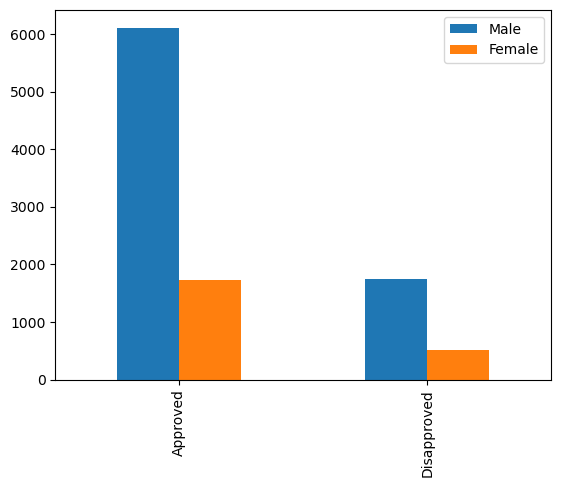

In [12]:
bar_chart("Gender")

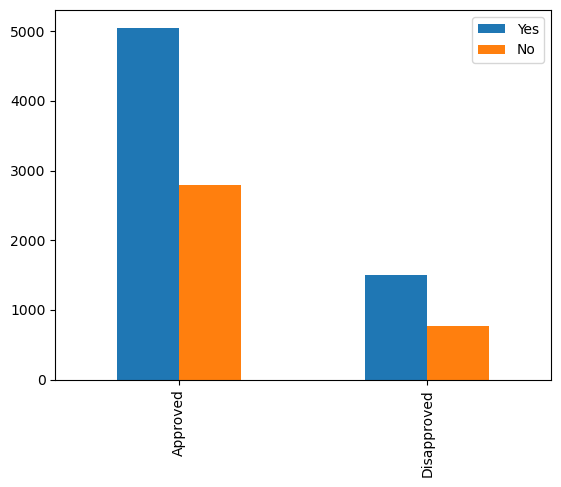

In [13]:
bar_chart("Married")

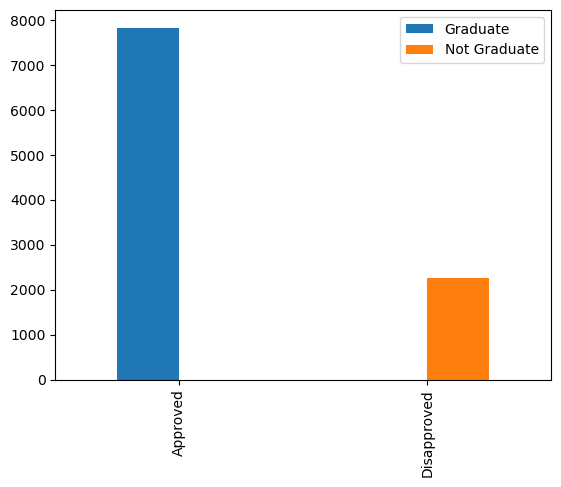

In [14]:
bar_chart("Education")

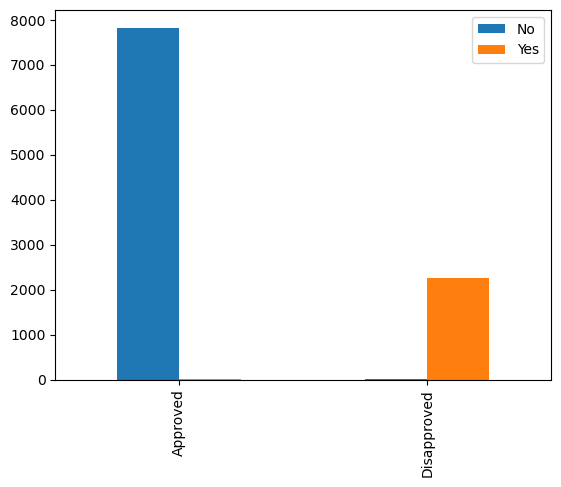

In [15]:
bar_chart("SelfEmployed")

In [16]:
from sklearn.preprocessing import OrdinalEncoder 

ord_enc = OrdinalEncoder() 
train_data[["Gender",'Married','Education','SelfEmployed','PropertyArea','FacilityStatus']] = ord_enc.fit_transform(train_data[["Gender",'Married','Education','SelfEmployed','PropertyArea','FacilityStatus']])
train_data.head()

,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,DebtConsolidationAmount,Tenor,CreditHistory,PropertyArea,FacilityStatus
0,1.0,0.0,0,0.0,0.0,78500,64800,600000,36,1,2.0,1.0
1,1.0,1.0,1,0.0,0.0,95200,92400,500000,36,1,2.0,1.0
2,1.0,1.0,0,0.0,0.0,87000,65000,400000,36,1,2.0,1.0
3,1.0,1.0,0,1.0,1.0,68000,52130,100000,36,0,0.0,0.0
4,1.0,0.0,0,0.0,0.0,196000,63000,300000,36,1,2.0,1.0


In [17]:
train_data[["Gender",'Married','Education','SelfEmployed','PropertyArea','FacilityStatus']] = train_data[["Gender",'Married','Education','SelfEmployed','PropertyArea','FacilityStatus']].astype('int')


In [18]:
train_data

,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,DebtConsolidationAmount,Tenor,CreditHistory,PropertyArea,FacilityStatus
0,1,0,0,0,0,78500,64800,600000,36,1,2,1
1,1,1,1,0,0,95200,92400,500000,36,1,2,1
2,1,1,0,0,0,87000,65000,400000,36,1,2,1
3,1,1,0,1,1,68000,52130,100000,36,0,0,0
4,1,0,0,0,0,196000,63000,300000,36,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10095,1,1,1,0,0,277050,113172,1750000,36,1,2,1
10096,1,0,0,0,0,277150,113192,1800000,36,1,2,1
10097,0,0,0,0,0,277250,113212,1850000,36,1,2,1
10098,1,1,0,1,1,66845,40784,128365,36,0,0,0


In [19]:
from sklearn.model_selection import train_test_split  
X = train_data.drop("FacilityStatus", axis=1) 
y = train_data["FacilityStatus"] 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=2) 
print(X_train.shape) 
print(y_train.shape)
print(X_test.shape) 
print(y_test.shape)

(6060, 11)
(6060,)
(4040, 11)
(4040,)


In [20]:
X

,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,DebtConsolidationAmount,Tenor,CreditHistory,PropertyArea
0,1,0,0,0,0,78500,64800,600000,36,1,2
1,1,1,1,0,0,95200,92400,500000,36,1,2
2,1,1,0,0,0,87000,65000,400000,36,1,2
3,1,1,0,1,1,68000,52130,100000,36,0,0
4,1,0,0,0,0,196000,63000,300000,36,1,2
...,...,...,...,...,...,...,...,...,...,...,...
10095,1,1,1,0,0,277050,113172,1750000,36,1,2
10096,1,0,0,0,0,277150,113192,1800000,36,1,2
10097,0,0,0,0,0,277250,113212,1850000,36,1,2
10098,1,1,0,1,1,66845,40784,128365,36,0,0


In [22]:
y

0        1
1        1
2        1
3        0
4        1
        ..
10095    1
10096    1
10097    1
10098    0
10099    0
Name: FacilityStatus, Length: 10100, dtype: int32

In [23]:
from sklearn.naive_bayes import GaussianNB 

gfc = GaussianNB() 
gfc.fit(X_train, y_train) 
pred1 = gfc.predict(X_test)

In [24]:
from sklearn.metrics import precision_score, recall_score, accuracy_score 

def loss(y_true, y_pred): 
    pre=  precision_score(y_true, y_pred) 
    rec = recall_score(y_true, y_pred) 
    acc = accuracy_score(y_true, y_pred) 
    
    print(pre) 
    print(rec) 
    print(acc)

In [25]:
loss(y_test, pred1)

0.9990445859872611
1.0
0.9992574257425743


In [23]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose =3) 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.776 total time=   3.9s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.776 total time=   3.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.776 total time=   3.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.776 total time=   3.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.776 total time=   3.9s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.776 total time=   3.6s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.776 total time=   3.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.776 total time=   3.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.776 total time=   3.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.776 total time=   3.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.776 total time=   3.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.776 total time=   3.3s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.776 total time=   3.2s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.776 total time=   3.2s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.776 total time=   3.2s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.776 total time=   3.3s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.776 total time=   3.5s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.776 total time=   3.5s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.776 total time=   3.4s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.776 total time=   3.4s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.776 total time=   3.4s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.776 total time=   3.5s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.776 total time=   3.9s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [24]:
grid.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [25]:
svc = SVC(C= 0.1, gamma= 1, kernel= 'rbf')  
svc.fit(X_train, y_train) 
pred2 = svc.predict(X_test) 
loss(y_test,pred2)

0.7764851485148515
1.0
0.7764851485148515


In [26]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb.fit(X_train, y_train) 
pred3 = xgb.predict(X_test) 
loss(y_test, pred3)

1.0
1.0
1.0


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV 

def randomized_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)): 
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2) 
    rand_clf.fit(X_train, y_train) 
    best_model = rand_clf.best_estimator_
    
    # Extract best score
    best_score = rand_clf.best_score_

    # Print best score
    print("Training score: {:.3f}".format(best_score))

    # Predict test set labels
    y_pred = best_model.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print accuracy
    print('Test score: {:.3f}'.format(accuracy))
    
    return best_model

In [28]:
randomized_search(params={'criterion':['entropy', 'gini'],
                              'splitter':['random', 'best'],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                          'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                          'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                          'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                          'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                          'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                          'max_depth':[None, 2,4,6,8],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
                         })

Training score: 1.000
Test score: 1.000


DecisionTreeClassifier(criterion='entropy', max_features=0.85,
                       max_leaf_nodes=30, min_impurity_decrease=0.005,
                       min_samples_split=10, min_weight_fraction_leaf=0.0075,
                       random_state=2)

In [29]:
ds = DecisionTreeClassifier(max_depth=8, max_features=0.9, max_leaf_nodes=30,
                       min_impurity_decrease=0.05, min_samples_leaf=0.02,
                       min_samples_split=10, min_weight_fraction_leaf=0.005,
                       random_state=2, splitter='random') 
ds.fit(X_train, y_train) 
pred4 =ds.predict(X_test) 
loss(y_test, pred4)

0.9996809189534142
0.9987248963978324
0.9987623762376238


In [30]:
from sklearn.ensemble import RandomForestClassifier 

randomized_search(params={
                         'min_samples_leaf':[1,2,4,6,8,10,20,30],
                          'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                          'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                          'max_depth':[None,2,4,6,8,10,20], 
                         }, clf=RandomForestClassifier(random_state=2)) 

C:\Users\nipun\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Training score: 1.000
Test score: 1.000


RandomForestClassifier(max_depth=8, max_features='auto',
                       min_impurity_decrease=0.2, random_state=2)

In [32]:
from sklearn.ensemble import RandomForestClassifier 
randomized_search(params={
                         'min_samples_leaf':[1,2,4,6,8,10,20,30],
                          'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                          'max_features':['sqrt', 0.8, 0.7, 0.6, 0.5, 0.4],
                          'max_depth':[None,2,4,6,8,10,20], 
                         }, clf=RandomForestClassifier(random_state=2, max_features='sqrt'))


Training score: 1.000
Test score: 1.000


RandomForestClassifier(max_depth=8, min_impurity_decrease=0.2, random_state=2)

In [31]:
import joblib 
joblib.dump(ds, "model.pkl") 
model = joblib.load('model.pkl' ) 
model.predict(X_test)

array([1, 0, 1, ..., 0, 0, 1])